# Kapitel 2: Verteilungen – Übungsbeispiele

**Statistik für Informatiker – DHBW Stuttgart**

In diesem Notebook werden die wichtigsten diskreten und stetigen Verteilungen aus Kapitel 2 anhand allgemeiner Beispiele veranschaulicht und geübt.

## Setup

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import comb, factorial, exp

# Darstellung
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
np.random.seed(42)

print("Setup abgeschlossen ✓")

Setup abgeschlossen ✓


---
## 1. Verteilungsfunktion (CDF)

Die **Verteilungsfunktion** (Cumulative Distribution Function, CDF) ordnet jedem Wert $x$ die Wahrscheinlichkeit zu, dass die Zufallsvariable $X$ höchstens den Wert $x$ annimmt:

$$F(x) = P(X \leq x)$$

Sie existiert für **alle** Verteilungen – diskret und stetig.

### Beispiel: Diskreter vs. stetiger Fall

Wir vergleichen die CDF einer **diskreten** Verteilung (Würfelwurf) mit einer **stetigen** Verteilung (Gleichverteilung auf [1, 6]).

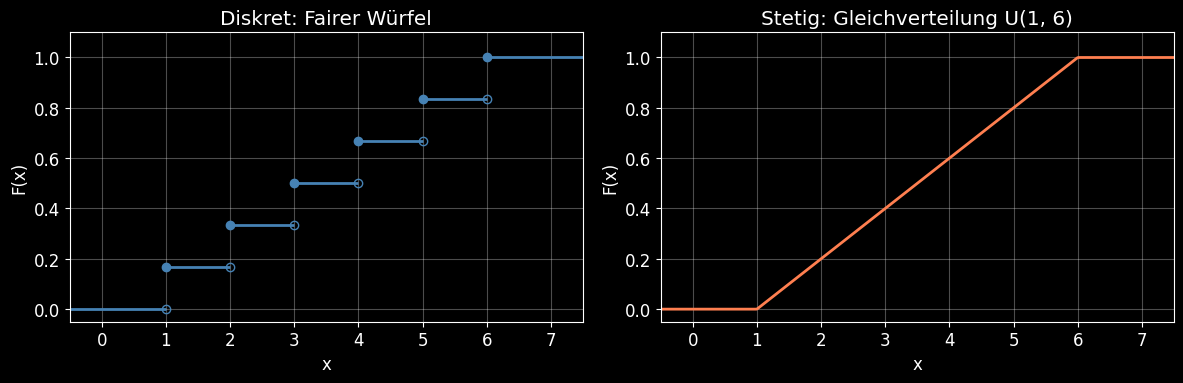

Links: Treppenfunktion (diskret) – Sprünge an den Stellen x = 1, 2, ..., 6
Rechts: Glatte Kurve (stetig) – stetig ansteigend von 0 auf 1


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Diskret: Würfelwurf ---
x_disc = np.arange(1, 7)
pmf = np.ones(6) / 6
cdf_disc = np.cumsum(pmf)

# Treppenfunktion zeichnen
ax = axes[0]
for i in range(6):
    x_start = x_disc[i]
    x_end = x_disc[i+1] if i < 5 else 7.5
    y = cdf_disc[i]
    ax.hlines(y, x_start, x_end, colors='steelblue', linewidth=2)
    ax.plot(x_start, y, 'o', color='steelblue', markersize=6)  # geschlossener Punkt
    if i < 5:
        ax.plot(x_end, y, 'o', color='steelblue', markersize=6, 
                fillstyle='none')  # offener Punkt

# Vor x=1
ax.hlines(0, -0.5, 1, colors='steelblue', linewidth=2)
ax.plot(1, 0, 'o', color='steelblue', markersize=6, fillstyle='none')

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Diskret: Fairer Würfel')
ax.set_xlim(-0.5, 7.5)
ax.set_ylim(-0.05, 1.1)

# --- Stetig: Gleichverteilung [1, 6] ---
ax = axes[1]
x_cont = np.linspace(-0.5, 7.5, 500)
cdf_cont = np.clip((x_cont - 1) / 5, 0, 1)
ax.plot(x_cont, cdf_cont, color='coral', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Stetig: Gleichverteilung U(1, 6)')
ax.set_xlim(-0.5, 7.5)
ax.set_ylim(-0.05, 1.1)

plt.tight_layout()
plt.show()

print("Links: Treppenfunktion (diskret) – Sprünge an den Stellen x = 1, 2, ..., 6")
print("Rechts: Glatte Kurve (stetig) – stetig ansteigend von 0 auf 1")

---
## 2. Binomialverteilung $B(n, p)$

Die Binomialverteilung beschreibt die **Anzahl der Erfolge** bei $n$ unabhängigen Versuchen mit Erfolgswahrscheinlichkeit $p$.

$$P(X = k) = \binom{n}{k} \, p^k \, (1-p)^{n-k}$$

### Beispiel 1: Qualitätskontrolle in der Produktion

Ein Hersteller produziert Glühbirnen mit einer Ausschussquote von $p = 0{,}08$ (8 % defekt). Eine Stichprobe von $n = 20$ Glühbirnen wird geprüft.

**Fragen:**
- Wie wahrscheinlich ist es, dass **genau 2** defekt sind?
- Wie wahrscheinlich ist es, dass **höchstens 1** defekt ist?
- Wie viele defekte Glühbirnen erwarten wir im Schnitt?

In [28]:
n, p = 20, 0.08
X = stats.binom(n, p)

# a) P(X = 2)
p_genau_2 = X.pmf(2)
print(f"a) P(X = 2) = {p_genau_2:.4f}")

# b) P(X <= 1)
p_hoechstens_1 = X.cdf(1)
print(f"b) P(X ≤ 1) = {p_hoechstens_1:.4f}")

# c) Erwartungswert und Standardabweichung
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
print(f"c) E(X) = n·p = {n}·{p} = {mu:.1f}")
print(f"   σ(X) = √(n·p·(1-p)) = {sigma:.2f}")

# Manuelle Berechnung zur Kontrolle
p_manual = comb(20, 2) * 0.08**2 * 0.92**18
print(f"\nKontrolle (manuell): P(X=2) = C(20,2) · 0.08² · 0.92¹⁸ = {p_manual:.4f}")

a) P(X = 2) = 0.2711
b) P(X ≤ 1) = 0.5169
c) E(X) = n·p = 20·0.08 = 1.6
   σ(X) = √(n·p·(1-p)) = 1.21

Kontrolle (manuell): P(X=2) = C(20,2) · 0.08² · 0.92¹⁸ = 0.2711


### Visualisierung: PMF und CDF der Binomialverteilung

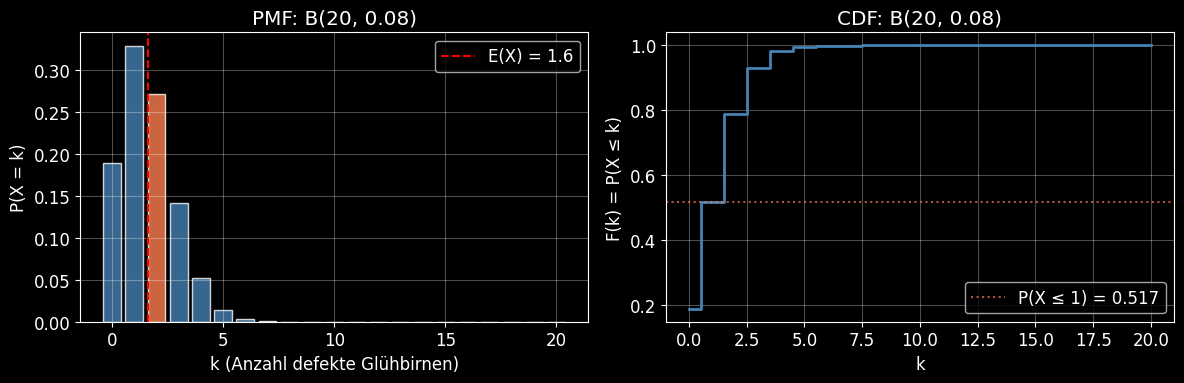

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

k = np.arange(0, n + 1)

# PMF
ax = axes[0]
colors = ['coral' if ki == 2 else 'steelblue' for ki in k]
ax.bar(k, X.pmf(k), color=colors, edgecolor='white', alpha=0.8)
ax.set_xlabel('k (Anzahl defekte Glühbirnen)')
ax.set_ylabel('P(X = k)')
ax.set_title(f'PMF: B({n}, {p})')
ax.axvline(mu, color='red', linestyle='--', label=f'E(X) = {mu:.1f}')
ax.legend()

# CDF
ax = axes[1]
ax.step(k, X.cdf(k), where='mid', color='steelblue', linewidth=2)
ax.axhline(p_hoechstens_1, color='coral', linestyle=':', alpha=0.7,
           label=f'P(X ≤ 1) = {p_hoechstens_1:.3f}')
ax.set_xlabel('k')
ax.set_ylabel('F(k) = P(X ≤ k)')
ax.set_title(f'CDF: B({n}, {p})')
ax.legend()

plt.tight_layout()
plt.show()

### Beispiel 2: Münzwurf – Symmetrie der Binomialverteilung

Wir vergleichen $B(20, 0.5)$ (faire Münze) mit $B(20, 0.2)$ (unfaire Münze), um die **Symmetrie** bzw. **Schiefe** zu verdeutlichen.

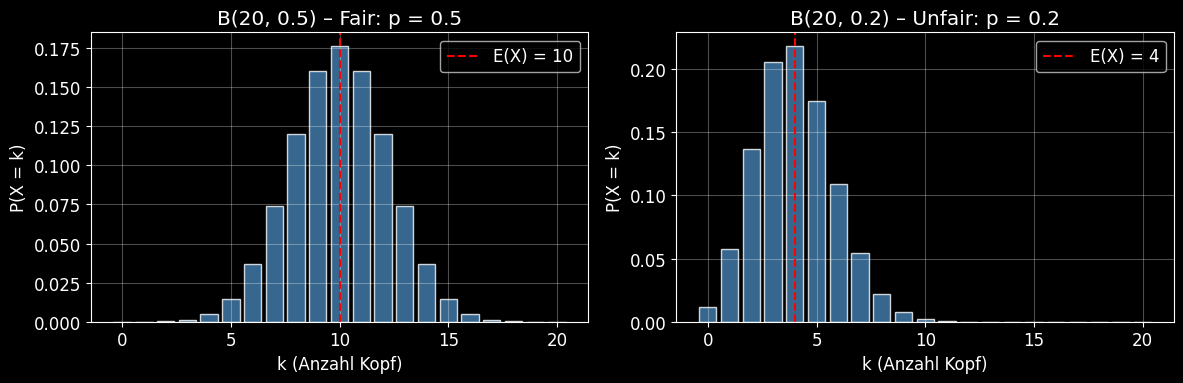

Links: Symmetrisch um E(X) = 10  (p = 0.5)
Rechts: Rechtsschief, Masse bei kleinen Werten  (p < 0.5)


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
k = np.arange(0, 21)

for ax, p_val, title in zip(axes, [0.5, 0.2], ['Fair: p = 0.5', 'Unfair: p = 0.2']):
    pmf = stats.binom.pmf(k, 20, p_val)
    ax.bar(k, pmf, color='steelblue', edgecolor='white', alpha=0.8)
    mu_val = 20 * p_val
    ax.axvline(mu_val, color='red', linestyle='--', label=f'E(X) = {mu_val:.0f}')
    ax.set_xlabel('k (Anzahl Kopf)')
    ax.set_ylabel('P(X = k)')
    ax.set_title(f'B(20, {p_val}) – {title}')
    ax.legend()

plt.tight_layout()
plt.show()

print("Links: Symmetrisch um E(X) = 10  (p = 0.5)")
print("Rechts: Rechtsschief, Masse bei kleinen Werten  (p < 0.5)")

### Übung 1: Saatgut-Keimung

Von einem Saatgut keimen erfahrungsgemäß 85 % der Samen. Ein Gärtner pflanzt 15 Samen.

**Aufgaben:**
1. Berechne $P(X = 15)$ – alle keimen.
2. Berechne $P(X \geq 13)$ – mindestens 13 keimen.
3. Berechne Erwartungswert und Standardabweichung.

In [31]:
n_s, p_s = 15, 0.85
X_s = stats.binom(n_s, p_s)

print("Saatgut-Keimung: X ~ B(15, 0.85)")
print(f"1) P(X = 15) = {X_s.pmf(15):.4f}")
print(f"2) P(X ≥ 13) = 1 - P(X ≤ 12) = {1 - X_s.cdf(12):.4f}")
print(f"3) E(X) = {n_s * p_s:.2f}, σ(X) = {np.sqrt(n_s * p_s * (1-p_s)):.2f}")

Saatgut-Keimung: X ~ B(15, 0.85)
1) P(X = 15) = 0.0874
2) P(X ≥ 13) = 1 - P(X ≤ 12) = 0.6042
3) E(X) = 12.75, σ(X) = 1.38


---
## 3. Hypergeometrische Verteilung $H(N, M, n)$

Die hypergeometrische Verteilung beschreibt die Anzahl der Erfolge bei $n$ Ziehungen **ohne Zurücklegen** aus einer Grundgesamtheit von $N$ Elementen mit $M$ Erfolgen.

$$P(X = k) = \frac{\binom{M}{k} \cdot \binom{N-M}{n-k}}{\binom{N}{n}}$$

### Beispiel: Kartenziehen aus einem Skatblatt

Ein Skatblatt hat $N = 32$ Karten, davon $M = 8$ Herz-Karten.  
Es werden $n = 5$ Karten **ohne Zurücklegen** gezogen.

**Frage:** Wie wahrscheinlich sind genau 2 Herz-Karten?

In [32]:
N, M, n_draw = 32, 8, 5
X_hyp = stats.hypergeom(N, M, n_draw)

# P(X = 2)
p_2herz = X_hyp.pmf(2)
print(f"P(X = 2) = {p_2herz:.4f}")

# Manuelle Berechnung
p_manual = (comb(8, 2) * comb(24, 3)) / comb(32, 5)
print(f"Kontrolle: C(8,2)·C(24,3) / C(32,5) = {comb(8,2)}·{comb(24,3)} / {comb(32,5)} = {p_manual:.4f}")

# Erwartungswert und Varianz
mu_hyp = n_draw * M / N
var_hyp = n_draw * (M/N) * ((N-M)/N) * ((N-n_draw)/(N-1))
print(f"\nE(X) = n·M/N = {n_draw}·{M}/{N} = {mu_hyp:.2f}")
print(f"Var(X) = {var_hyp:.4f},  σ(X) = {np.sqrt(var_hyp):.2f}")

# Vollständige Verteilung
print("\nVerteilung:")
for k in range(min(M, n_draw) + 1):
    pk = X_hyp.pmf(k)
    if pk > 0.0001:
        print(f"  P(X = {k}) = {pk:.4f}")

P(X = 2) = 0.2814
Kontrolle: C(8,2)·C(24,3) / C(32,5) = 28·2024 / 201376 = 0.2814

E(X) = n·M/N = 5·8/32 = 1.25
Var(X) = 0.8165,  σ(X) = 0.90

Verteilung:
  P(X = 0) = 0.2111
  P(X = 1) = 0.4221
  P(X = 2) = 0.2814
  P(X = 3) = 0.0768
  P(X = 4) = 0.0083
  P(X = 5) = 0.0003


### Visualisierung: Hypergeometrisch vs. Binomial

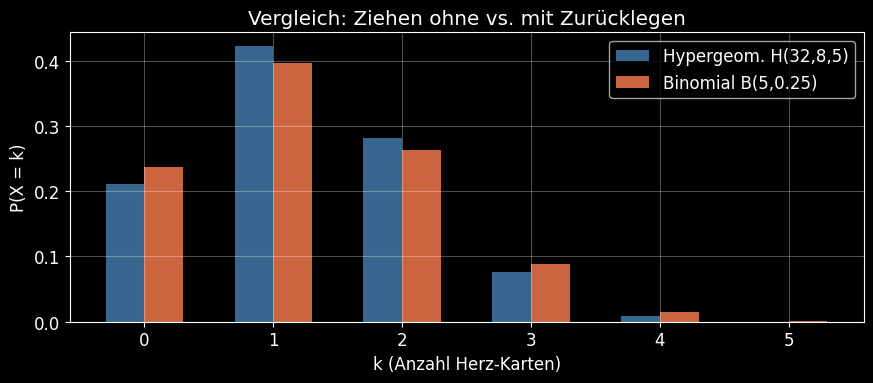

Bei kleinem Stichprobenanteil (n/N = 5/32 = 0.16)
sind Hypergeometrische und Binomialverteilung ähnlich.


In [33]:
fig, ax = plt.subplots(figsize=(9, 4))
k = np.arange(0, min(M, n_draw) + 1)

# Hypergeometrisch (ohne Zurücklegen)
ax.bar(k - 0.15, X_hyp.pmf(k), width=0.3, color='steelblue', 
       label=f'Hypergeom. H({N},{M},{n_draw})', alpha=0.8)

# Binomial-Approximation (mit Zurücklegen)
p_approx = M / N
ax.bar(k + 0.15, stats.binom.pmf(k, n_draw, p_approx), width=0.3, 
       color='coral', label=f'Binomial B({n_draw},{p_approx:.2f})', alpha=0.8)

ax.set_xlabel('k (Anzahl Herz-Karten)')
ax.set_ylabel('P(X = k)')
ax.set_title('Vergleich: Ziehen ohne vs. mit Zurücklegen')
ax.legend()
ax.set_xticks(k)
plt.tight_layout()
plt.show()

print(f"Bei kleinem Stichprobenanteil (n/N = {n_draw}/{N} = {n_draw/N:.2f})")
print("sind Hypergeometrische und Binomialverteilung ähnlich.")

### Übung 2: Tombola

Auf einer Tombola gibt es 100 Lose, davon 15 Gewinne. Du kaufst 4 Lose.

**Aufgaben:**
1. Wie wahrscheinlich ist **mindestens ein Gewinn**?
2. Wie wahrscheinlich sind **genau 2 Gewinne**?
3. Vergleiche mit der Binomial-Approximation ($p = 0{,}15$).

In [34]:
N_t, M_t, n_t = 100, 15, 4
X_t = stats.hypergeom(N_t, M_t, n_t)
X_b = stats.binom(n_t, M_t / N_t)

print("Tombola: X ~ H(100, 15, 4)")
print(f"1) P(X ≥ 1) = 1 - P(X=0) = {1 - X_t.pmf(0):.4f}")
print(f"2) P(X = 2) = {X_t.pmf(2):.4f}")
print(f"\nVergleich mit Binomial B(4, 0.15):")
print(f"   P_binom(X ≥ 1) = {1 - X_b.pmf(0):.4f}")
print(f"   P_binom(X = 2) = {X_b.pmf(2):.4f}")
print(f"\nAbweichung gering, da n/N = {n_t/N_t:.2f} < 0.05")

Tombola: X ~ H(100, 15, 4)
1) P(X ≥ 1) = 1 - P(X=0) = 0.4836
2) P(X = 2) = 0.0956

Vergleich mit Binomial B(4, 0.15):
   P_binom(X ≥ 1) = 0.4780
   P_binom(X = 2) = 0.0975

Abweichung gering, da n/N = 0.04 < 0.05


---
## 4. Poisson-Verteilung $\text{Po}(\lambda)$

Die Poisson-Verteilung beschreibt die **Anzahl von Ereignissen** in einem festen Zeitintervall oder Bereich, wenn Ereignisse mit konstanter Rate $\lambda$ auftreten.

$$P(X = k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda}$$

**Besonderheit:** $E(X) = \text{Var}(X) = \lambda$

### Beispiel 1: Unfälle an einer Kreuzung

An einer bestimmten Kreuzung ereignen sich im Durchschnitt $\lambda = 3$ Unfälle pro Monat.

**Fragen:**
- Wie wahrscheinlich sind genau 5 Unfälle in einem Monat?
- Wie wahrscheinlich ist ein unfallfreier Monat?
- Wie wahrscheinlich sind höchstens 2 Unfälle?

In [35]:
lam = 3
X_pois = stats.poisson(lam)

print(f"Unfälle pro Monat: X ~ Po({lam})")
print(f"a) P(X = 5) = {X_pois.pmf(5):.4f}")
print(f"b) P(X = 0) = e^(-{lam}) = {X_pois.pmf(0):.4f}")
print(f"c) P(X ≤ 2) = {X_pois.cdf(2):.4f}")

# Manuelle Berechnung
p5_manual = (lam**5 / factorial(5)) * exp(-lam)
print(f"\nKontrolle P(X=5): {lam}⁵/5! · e^(-{lam}) = {p5_manual:.4f}")

print(f"\nE(X) = λ = {lam}")
print(f"Var(X) = λ = {lam}")
print(f"σ(X) = √λ = {np.sqrt(lam):.2f}")

Unfälle pro Monat: X ~ Po(3)
a) P(X = 5) = 0.1008
b) P(X = 0) = e^(-3) = 0.0498
c) P(X ≤ 2) = 0.4232

Kontrolle P(X=5): 3⁵/5! · e^(-3) = 0.1008

E(X) = λ = 3
Var(X) = λ = 3
σ(X) = √λ = 1.73


### Visualisierung: Poisson-Verteilung für verschiedene λ

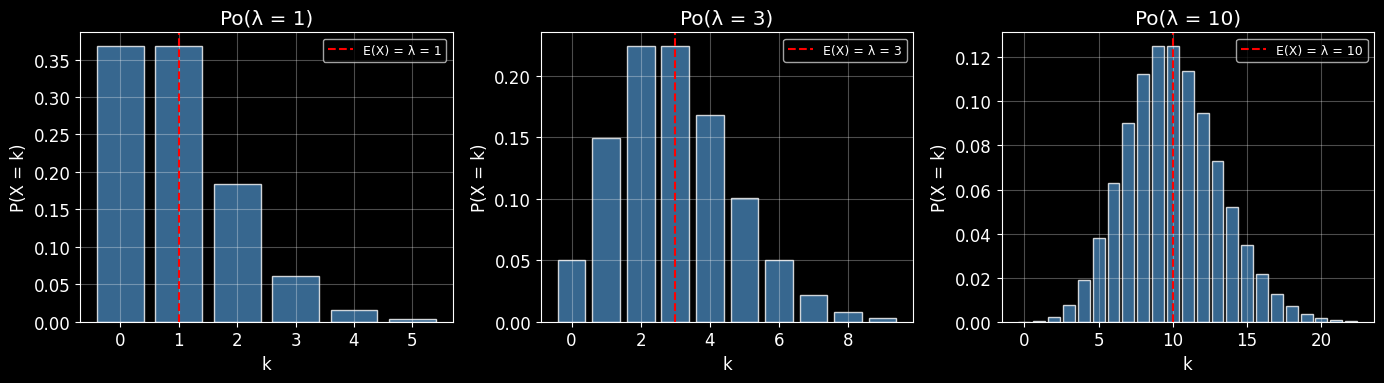

Mit steigendem λ wird die Verteilung symmetrischer und nähert sich einer Glockenform.


In [36]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
lambdas = [1, 3, 10]

for ax, lam_val in zip(axes, lambdas):
    X_p = stats.poisson(lam_val)
    k_max = int(lam_val + 4 * np.sqrt(lam_val)) + 1
    k = np.arange(0, k_max)
    ax.bar(k, X_p.pmf(k), color='steelblue', edgecolor='white', alpha=0.8)
    ax.axvline(lam_val, color='red', linestyle='--', label=f'E(X) = λ = {lam_val}')
    ax.set_xlabel('k')
    ax.set_ylabel('P(X = k)')
    ax.set_title(f'Po(λ = {lam_val})')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("Mit steigendem λ wird die Verteilung symmetrischer und nähert sich einer Glockenform.")

### Beispiel 2: Poisson als Approximation der Binomialverteilung

Ein Buch hat 500 Seiten. Auf jeder Seite ist die Wahrscheinlichkeit für einen Druckfehler $p = 0{,}004$.

→ $n = 500$ groß, $p = 0{,}004$ klein, $\lambda = np = 2$

Vergleich: $B(500, 0{,}004)$ vs. $\text{Po}(2)$

In [37]:
n_b, p_b = 500, 0.004
lam_approx = n_b * p_b

X_bin = stats.binom(n_b, p_b)
X_poi = stats.poisson(lam_approx)

print(f"Druckfehler: B({n_b}, {p_b}) ≈ Po({lam_approx})")
print(f"{'k':<4} {'Binomial':>10} {'Poisson':>10} {'Differenz':>10}")
print("-" * 38)
for k in range(8):
    pb = X_bin.pmf(k)
    pp = X_poi.pmf(k)
    print(f"{k:<4} {pb:>10.6f} {pp:>10.6f} {abs(pb-pp):>10.6f}")

print(f"\nFaustregel erfüllt: n={n_b} > 50 und p={p_b} < 0.05 ✓")

Druckfehler: B(500, 0.004) ≈ Po(2.0)
k      Binomial    Poisson  Differenz
--------------------------------------
0      0.134794   0.135335   0.000542
1      0.270670   0.270671   0.000001
2      0.271213   0.270671   0.000543
3      0.180809   0.180447   0.000362
4      0.090223   0.090224   0.000001
5      0.035944   0.036089   0.000145
6      0.011909   0.012030   0.000121
7      0.003375   0.003437   0.000062

Faustregel erfüllt: n=500 > 50 und p=0.004 < 0.05 ✓


### Übung 3: Sternschnuppen

In einer klaren Augustnacht kann man durchschnittlich $\lambda = 12$ Sternschnuppen pro Stunde beobachten.

**Aufgaben:**
1. Wie wahrscheinlich sind **genau 10** Sternschnuppen in einer Stunde?
2. Wie wahrscheinlich sind **mehr als 15**?
3. Wie viele Sternschnuppen erwartet man in **30 Minuten**?  
   Berechne $P(X = 8)$ für diesen Zeitraum.

In [38]:
lam_s = 12
X_stern = stats.poisson(lam_s)

print(f"Sternschnuppen: X ~ Po({lam_s})")
print(f"1) P(X = 10) = {X_stern.pmf(10):.4f}")
print(f"2) P(X > 15) = 1 - P(X ≤ 15) = {1 - X_stern.cdf(15):.4f}")

lam_30 = lam_s / 2  # 30 Minuten = halbe Rate
X_30 = stats.poisson(lam_30)
print(f"3) In 30 Min: λ = {lam_30}, P(X = 8) = {X_30.pmf(8):.4f}")

Sternschnuppen: X ~ Po(12)
1) P(X = 10) = 0.1048
2) P(X > 15) = 1 - P(X ≤ 15) = 0.1556
3) In 30 Min: λ = 6.0, P(X = 8) = 0.1033


---
## 5. Gleichverteilung $U(a, b)$

Eine stetige Zufallsvariable ist gleichverteilt auf $[a, b]$, wenn jeder Wert im Intervall gleich wahrscheinlich ist.

$$f(x) = \frac{1}{b-a} \quad \text{für } a \leq x \leq b$$

$$E(X) = \frac{a+b}{2}, \quad \text{Var}(X) = \frac{(b-a)^2}{12}$$

### Beispiel: Wartezeit an der Bushaltestelle

Ein Bus kommt alle 10 Minuten. Die Wartezeit eines zufällig ankommenden Fahrgastes ist gleichverteilt auf $[0, 10]$ Minuten.

$$X \sim U(0, 10)$$

In [39]:
a, b = 0, 10
X_unif = stats.uniform(loc=a, scale=b - a)

print(f"Wartezeit: X ~ U({a}, {b})")
print(f"E(X) = (a+b)/2 = {(a+b)/2:.1f} Minuten")
print(f"Var(X) = (b-a)²/12 = {(b-a)**2/12:.2f}")
print(f"σ(X) = {np.sqrt((b-a)**2/12):.2f} Minuten")
print()
print(f"P(X ≤ 3) = {X_unif.cdf(3):.2f}")
print(f"P(2 ≤ X ≤ 5) = F(5) - F(2) = {X_unif.cdf(5) - X_unif.cdf(2):.2f}")
print(f"P(X > 7) = 1 - F(7) = {1 - X_unif.cdf(7):.2f}")

Wartezeit: X ~ U(0, 10)
E(X) = (a+b)/2 = 5.0 Minuten
Var(X) = (b-a)²/12 = 8.33
σ(X) = 2.89 Minuten

P(X ≤ 3) = 0.30
P(2 ≤ X ≤ 5) = F(5) - F(2) = 0.30
P(X > 7) = 1 - F(7) = 0.30


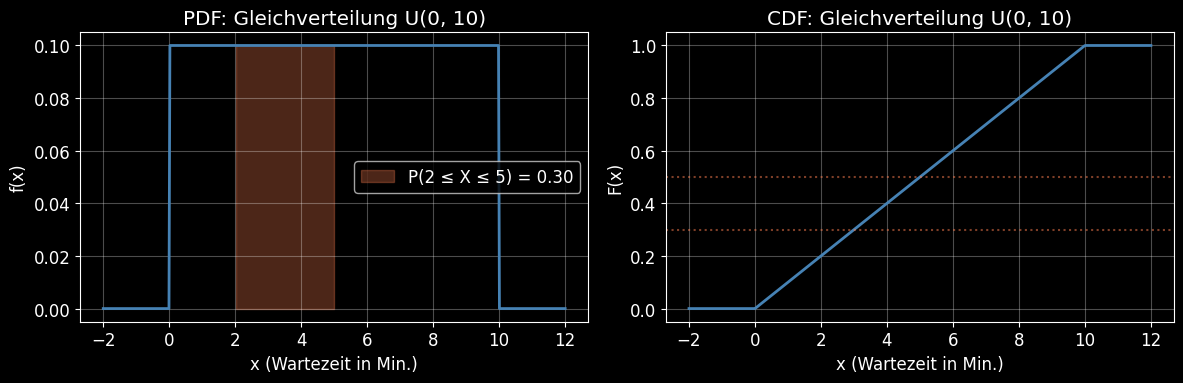

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(-2, 12, 500)

# PDF
ax = axes[0]
ax.plot(x, X_unif.pdf(x), 'steelblue', linewidth=2)
ax.fill_between(x, X_unif.pdf(x), where=(x >= 2) & (x <= 5), 
                alpha=0.3, color='coral', label='P(2 ≤ X ≤ 5) = 0.30')
ax.set_xlabel('x (Wartezeit in Min.)')
ax.set_ylabel('f(x)')
ax.set_title('PDF: Gleichverteilung U(0, 10)')
ax.legend()

# CDF
ax = axes[1]
ax.plot(x, X_unif.cdf(x), 'steelblue', linewidth=2)
ax.axhline(0.3, color='coral', linestyle=':', alpha=0.5)
ax.axhline(0.5, color='coral', linestyle=':', alpha=0.5)
ax.set_xlabel('x (Wartezeit in Min.)')
ax.set_ylabel('F(x)')
ax.set_title('CDF: Gleichverteilung U(0, 10)')

plt.tight_layout()
plt.show()

---
## 6. Exponentialverteilung $\text{Exp}(\lambda)$

Die Exponentialverteilung beschreibt die **Wartezeit** bis zum nächsten Ereignis in einem Poisson-Prozess.

$$f(x) = \lambda \cdot e^{-\lambda x} \quad (x \geq 0)$$

$$E(X) = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}$$

**Wichtig:** Die Exponentialverteilung ist **gedächtnislos**: $P(X > s+t \mid X > s) = P(X > t)$

### Beispiel 1: Wartezeit zwischen Erdbeben

In einer Region treten im Durchschnitt 2 spürbare Erdbeben pro Jahr auf ($\lambda = 2$).  
Die Wartezeit bis zum nächsten Erdbeben ist exponentialverteilt.

$$X \sim \text{Exp}(2)$$

In [41]:
lam_e = 2
X_exp = stats.expon(scale=1/lam_e)  # scipy: scale = 1/λ

print(f"Wartezeit bis Erdbeben: X ~ Exp({lam_e})")
print(f"E(X) = 1/λ = {1/lam_e:.1f} Jahre (durchschnittliche Wartezeit)")
print(f"σ(X) = 1/λ = {1/lam_e:.1f} Jahre")
print()

# Wahrscheinlichkeiten
print(f"P(X ≤ 0.5) = 1 - e^(-{lam_e}·0.5) = {X_exp.cdf(0.5):.4f}")
print(f"  → Wahrscheinlichkeit eines Erdbebens innerhalb von 6 Monaten")
print()
print(f"P(X > 1) = e^(-{lam_e}·1) = {1 - X_exp.cdf(1):.4f}")
print(f"  → Wahrscheinlichkeit, dass über 1 Jahr kein Erdbeben auftritt")

Wartezeit bis Erdbeben: X ~ Exp(2)
E(X) = 1/λ = 0.5 Jahre (durchschnittliche Wartezeit)
σ(X) = 1/λ = 0.5 Jahre

P(X ≤ 0.5) = 1 - e^(-2·0.5) = 0.6321
  → Wahrscheinlichkeit eines Erdbebens innerhalb von 6 Monaten

P(X > 1) = e^(-2·1) = 0.1353
  → Wahrscheinlichkeit, dass über 1 Jahr kein Erdbeben auftritt


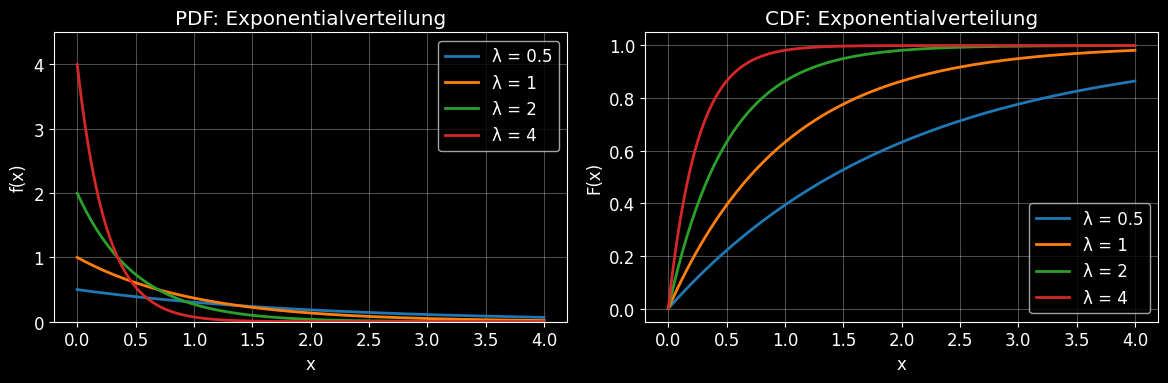

Höheres λ → schnellerer Anstieg → kürzere Wartezeiten erwartet.


In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(0, 4, 200)

# PDF für verschiedene λ
ax = axes[0]
for lam_val, color in zip([0.5, 1, 2, 4], ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']):
    X_e = stats.expon(scale=1/lam_val)
    ax.plot(x, X_e.pdf(x), linewidth=2, label=f'λ = {lam_val}', color=color)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('PDF: Exponentialverteilung')
ax.legend()
ax.set_ylim(0, 4.5)

# CDF
ax = axes[1]
for lam_val, color in zip([0.5, 1, 2, 4], ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']):
    X_e = stats.expon(scale=1/lam_val)
    ax.plot(x, X_e.cdf(x), linewidth=2, label=f'λ = {lam_val}', color=color)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('CDF: Exponentialverteilung')
ax.legend()

plt.tight_layout()
plt.show()

print("Höheres λ → schnellerer Anstieg → kürzere Wartezeiten erwartet.")

### Gedächtnislosigkeit demonstrieren

Wenn bereits $s = 0{,}5$ Jahre ohne Erdbeben vergangen sind, ist die Wahrscheinlichkeit für weitere $t = 0{,}5$ Jahre **genauso groß** wie am Anfang.

In [43]:
lam_e = 2
s, t = 0.5, 0.5

# P(X > t)
p_t = np.exp(-lam_e * t)
# P(X > s+t | X > s) = P(X > s+t) / P(X > s)
p_bedingt = np.exp(-lam_e * (s + t)) / np.exp(-lam_e * s)

print("Gedächtnislosigkeit der Exponentialverteilung:")
print(f"P(X > {t}) = e^(-{lam_e}·{t}) = {p_t:.4f}")
print(f"P(X > {s+t} | X > {s}) = e^(-{lam_e}·{s+t}) / e^(-{lam_e}·{s}) = {p_bedingt:.4f}")
print(f"\n→ Beide Wahrscheinlichkeiten sind identisch: {p_t:.4f} = {p_bedingt:.4f} ✓")
print("\nDie 'Vorgeschichte' spielt keine Rolle – das System hat kein 'Gedächtnis'.")

Gedächtnislosigkeit der Exponentialverteilung:
P(X > 0.5) = e^(-2·0.5) = 0.3679
P(X > 1.0 | X > 0.5) = e^(-2·1.0) / e^(-2·0.5) = 0.3679

→ Beide Wahrscheinlichkeiten sind identisch: 0.3679 = 0.3679 ✓

Die 'Vorgeschichte' spielt keine Rolle – das System hat kein 'Gedächtnis'.


### Übung 4: Lebensdauer einer Batterie

Die Lebensdauer einer Batterie ist exponentialverteilt mit einer mittleren Lebensdauer von 200 Stunden.

**Aufgaben:**
1. Bestimme den Parameter $\lambda$.
2. Wie wahrscheinlich hält die Batterie **mindestens 300 Stunden**?
3. Die Batterie läuft bereits seit 150 Stunden. Wie wahrscheinlich hält sie **noch 100 weitere** Stunden?  
   Vergleiche mit der Antwort aus Aufgabe 2 (Gedächtnislosigkeit!).

In [44]:
# Mittlere Lebensdauer = E(X) = 1/λ = 200h
lam_bat = 1 / 200
X_bat = stats.expon(scale=200)

print(f"Batterie-Lebensdauer: X ~ Exp(λ = {lam_bat})")
print(f"1) λ = 1/E(X) = 1/200 = {lam_bat}")
print(f"2) P(X ≥ 300) = e^(-{lam_bat}·300) = {1 - X_bat.cdf(300):.4f}")
# Gedächtnislosigkeit: P(X > 250 | X > 150) = P(X > 100)
p_noch_100 = np.exp(-lam_bat * 100)
print(f"3) P(X > 250 | X > 150) = P(X > 100) = e^(-{lam_bat}·100) = {p_noch_100:.4f}")
p_mind_300 = np.exp(-lam_bat * 300)
print(f"   Vergleich mit P(X ≥ 300) = {p_mind_300:.4f}")
print(f"   → P(X > 100) = {p_noch_100:.4f} ≠ P(X > 300) = {p_mind_300:.4f}")
print(f"   → Aber: P(noch 100h | schon 150h) = P(100h von Anfang) ✓")

Batterie-Lebensdauer: X ~ Exp(λ = 0.005)
1) λ = 1/E(X) = 1/200 = 0.005
2) P(X ≥ 300) = e^(-0.005·300) = 0.2231
3) P(X > 250 | X > 150) = P(X > 100) = e^(-0.005·100) = 0.6065
   Vergleich mit P(X ≥ 300) = 0.2231
   → P(X > 100) = 0.6065 ≠ P(X > 300) = 0.2231
   → Aber: P(noch 100h | schon 150h) = P(100h von Anfang) ✓


---
## 7. Normalverteilung $N(\mu, \sigma^2)$

Die Normalverteilung ist die wichtigste stetige Verteilung. Ihre Dichtefunktion ist die bekannte Glockenkurve:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Standardisierung:** $Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$

### Beispiel 1: Gewicht von Äpfeln

Das Gewicht von Äpfeln einer Sorte ist normalverteilt mit $\mu = 180\text{ g}$ und $\sigma = 20\text{ g}$.

$$X \sim N(180, 20^2)$$

In [45]:
mu_a, sigma_a = 180, 20
X_norm = stats.norm(mu_a, sigma_a)

# a) P(X ≤ 200)
z1 = (200 - mu_a) / sigma_a
p_200 = X_norm.cdf(200)
print(f"Apfelgewicht: X ~ N({mu_a}, {sigma_a}²)")
print(f"a) P(X ≤ 200) = Φ((200-{mu_a})/{sigma_a}) = Φ({z1}) = {p_200:.4f}")

# b) P(160 ≤ X ≤ 200)
z_lo = (160 - mu_a) / sigma_a
z_hi = (200 - mu_a) / sigma_a
p_intervall = X_norm.cdf(200) - X_norm.cdf(160)
print(f"b) P(160 ≤ X ≤ 200) = Φ({z_hi}) - Φ({z_lo}) = {p_intervall:.4f}")

# c) Welches Gewicht wird von 90% nicht überschritten?
x_90 = X_norm.ppf(0.90)
print(f"c) 90%-Quantil: x = {x_90:.1f} g  (z = {stats.norm.ppf(0.90):.3f})")

print()
print("68-95-99.7-Regel:")
for k in [1, 2, 3]:
    p_k = X_norm.cdf(mu_a + k*sigma_a) - X_norm.cdf(mu_a - k*sigma_a)
    print(f"  P({mu_a-k*sigma_a} ≤ X ≤ {mu_a+k*sigma_a}) = {p_k:.4f}  ({k}σ-Intervall)")

Apfelgewicht: X ~ N(180, 20²)
a) P(X ≤ 200) = Φ((200-180)/20) = Φ(1.0) = 0.8413
b) P(160 ≤ X ≤ 200) = Φ(1.0) - Φ(-1.0) = 0.6827
c) 90%-Quantil: x = 205.6 g  (z = 1.282)

68-95-99.7-Regel:
  P(160 ≤ X ≤ 200) = 0.6827  (1σ-Intervall)
  P(140 ≤ X ≤ 220) = 0.9545  (2σ-Intervall)
  P(120 ≤ X ≤ 240) = 0.9973  (3σ-Intervall)


### Visualisierung: Normalverteilung und Sigma-Regeln

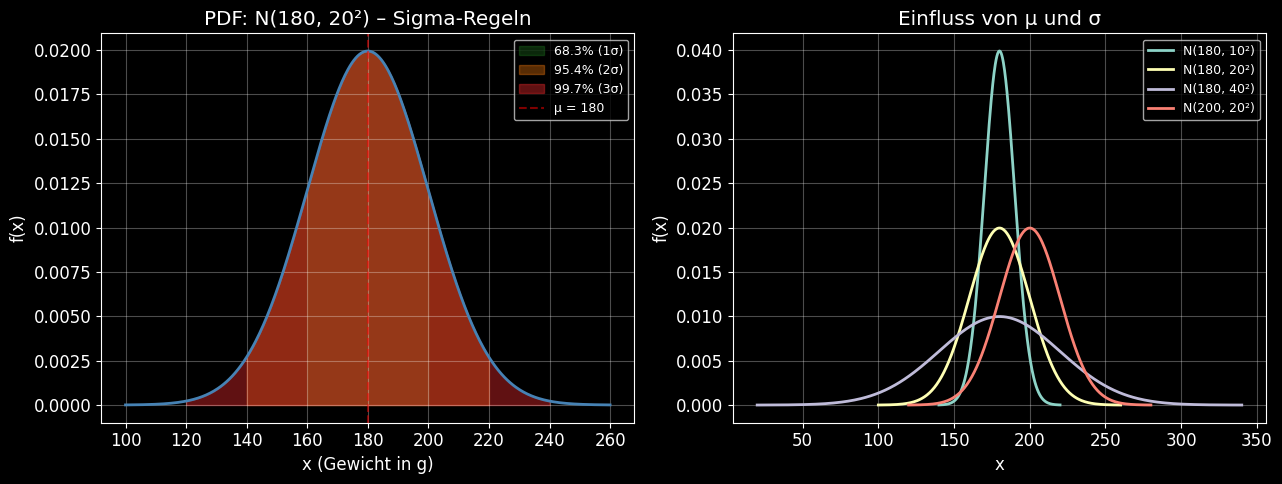

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# PDF mit Sigma-Regeln
ax = axes[0]
x = np.linspace(mu_a - 4*sigma_a, mu_a + 4*sigma_a, 500)
ax.plot(x, X_norm.pdf(x), 'steelblue', linewidth=2)

colors_sigma = ['#2ca02c', '#ff7f0e', '#d62728']
labels_sigma = ['68.3% (1σ)', '95.4% (2σ)', '99.7% (3σ)']
for k, (col, lab) in enumerate(zip(colors_sigma, labels_sigma), 1):
    lo, hi = mu_a - k*sigma_a, mu_a + k*sigma_a
    x_fill = np.linspace(lo, hi, 200)
    ax.fill_between(x_fill, X_norm.pdf(x_fill), alpha=0.15 + 0.1*k, color=col, label=lab)

ax.axvline(mu_a, color='red', linestyle='--', alpha=0.5, label=f'μ = {mu_a}')
ax.set_xlabel('x (Gewicht in g)')
ax.set_ylabel('f(x)')
ax.set_title(f'PDF: N({mu_a}, {sigma_a}²) – Sigma-Regeln')
ax.legend(fontsize=9)

# Verschiedene Normalverteilungen
ax = axes[1]
params = [(180, 10), (180, 20), (180, 40), (200, 20)]
for mu_v, sig_v in params:
    X_v = stats.norm(mu_v, sig_v)
    x_v = np.linspace(mu_v - 4*sig_v, mu_v + 4*sig_v, 300)
    ax.plot(x_v, X_v.pdf(x_v), linewidth=2, label=f'N({mu_v}, {sig_v}²)')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Einfluss von μ und σ')
ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

### Beispiel 2: Standardisierung in der Praxis

Prüfungsergebnisse sind normalverteilt: $X \sim N(65, 12^2)$ Punkte.

Ab 80 Punkten gibt es die Note 1. Welcher Anteil der Studierenden erreicht das?

In [47]:
mu_p, sigma_p = 65, 12
X_pruef = stats.norm(mu_p, sigma_p)

z_80 = (80 - mu_p) / sigma_p
p_note1 = 1 - X_pruef.cdf(80)

print(f"Prüfungsergebnisse: X ~ N({mu_p}, {sigma_p}²)")
print(f"z = (80 - {mu_p}) / {sigma_p} = {z_80:.2f}")
print(f"P(X ≥ 80) = 1 - Φ({z_80:.2f}) = {p_note1:.4f}")
print(f"→ Etwa {p_note1*100:.1f}% der Studierenden erreichen Note 1")

# Welche Punktzahl markiert die besten 5%?
x_top5 = X_pruef.ppf(0.95)
print(f"\nDie besten 5% erreichen mindestens {x_top5:.1f} Punkte")
print(f"  (z₀.₉₅ = {stats.norm.ppf(0.95):.3f})")

Prüfungsergebnisse: X ~ N(65, 12²)
z = (80 - 65) / 12 = 1.25
P(X ≥ 80) = 1 - Φ(1.25) = 0.1056
→ Etwa 10.6% der Studierenden erreichen Note 1

Die besten 5% erreichen mindestens 84.7 Punkte
  (z₀.₉₅ = 1.645)


### Übung 5: Körpergröße

Die Körpergröße erwachsener Männer in Deutschland ist normalverteilt mit $\mu = 178$ cm und $\sigma = 7$ cm.

**Aufgaben:**
1. Welcher Anteil ist größer als 190 cm?
2. Wie groß ist die Wahrscheinlichkeit, zwischen 170 und 185 cm groß zu sein?
3. Welche Körpergröße wird von 95 % der Männer nicht überschritten?

In [48]:
mu_k, sigma_k = 178, 7
X_k = stats.norm(mu_k, sigma_k)

print(f"Körpergröße: X ~ N({mu_k}, {sigma_k}²)")
print(f"1) P(X > 190) = 1 - Φ({(190-mu_k)/sigma_k:.2f}) = {1 - X_k.cdf(190):.4f}")
print(f"   → Etwa {(1-X_k.cdf(190))*100:.1f}% sind größer als 190 cm")
print(f"2) P(170 ≤ X ≤ 185) = {X_k.cdf(185) - X_k.cdf(170):.4f}")
print(f"   → Etwa {(X_k.cdf(185)-X_k.cdf(170))*100:.1f}%")
print(f"3) 95%-Quantil: {X_k.ppf(0.95):.1f} cm")

Körpergröße: X ~ N(178, 7²)
1) P(X > 190) = 1 - Φ(1.71) = 0.0432
   → Etwa 4.3% sind größer als 190 cm
2) P(170 ≤ X ≤ 185) = 0.7148
   → Etwa 71.5%
3) 95%-Quantil: 189.5 cm


---
## 8. Additionssatz für Normalverteilungen

Falls $X \sim N(\mu_1, \sigma_1^2)$ und $Y \sim N(\mu_2, \sigma_2^2)$ **unabhängig**, dann:

$$X + Y \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$$

### Beispiel: Gesamtgewicht zweier Pakete

Paket A wiegt im Schnitt 5 kg mit σ = 0,3 kg. Paket B wiegt im Schnitt 8 kg mit σ = 0,5 kg.

$$A \sim N(5;\; 0{,}3^2), \quad B \sim N(8;\; 0{,}5^2)$$

Wie wahrscheinlich überschreitet das Gesamtgewicht 14 kg?

In [49]:
mu_sum = 5 + 8
var_sum = 0.3**2 + 0.5**2
sigma_sum = np.sqrt(var_sum)

X_sum = stats.norm(mu_sum, sigma_sum)
print(f"A + B ~ N({mu_sum}, {var_sum:.2f})")
print(f"σ(A+B) = √({0.3**2} + {0.5**2}) = {sigma_sum:.3f} kg")
print(f"P(A+B > 14) = 1 - Φ({(14-mu_sum)/sigma_sum:.2f}) = {1 - X_sum.cdf(14):.4f}")

# Simulation zur Überprüfung
np.random.seed(42)
A_sim = np.random.normal(5, 0.3, 100_000)
B_sim = np.random.normal(8, 0.5, 100_000)
p_sim = np.mean((A_sim + B_sim) > 14)
print(f"\nSimulation (n=100.000): P(A+B > 14) ≈ {p_sim:.4f}")

A + B ~ N(13, 0.34)
σ(A+B) = √(0.09 + 0.25) = 0.583 kg
P(A+B > 14) = 1 - Φ(1.71) = 0.0432

Simulation (n=100.000): P(A+B > 14) ≈ 0.0434


---
## 9. Zusammenfassung: Alle Verteilungen im Überblick

### Übersicht der Kennzahlen

| Verteilung | Parameter | E(X) | Var(X) |
|:---|:---|:---|:---|
| **Binomial** $B(n,p)$ | $n, p$ | $np$ | $np(1-p)$ |
| **Hypergeom.** $H(N,M,n)$ | $N, M, n$ | $n\frac{M}{N}$ | $n\frac{M}{N}\frac{N-M}{N}\frac{N-n}{N-1}$ |
| **Poisson** $\text{Po}(\lambda)$ | $\lambda$ | $\lambda$ | $\lambda$ |
| **Gleichvert.** $U(a,b)$ | $a, b$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ |
| **Exponential** $\text{Exp}(\lambda)$ | $\lambda$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ |
| **Normal** $N(\mu,\sigma^2)$ | $\mu, \sigma^2$ | $\mu$ | $\sigma^2$ |

### Entscheidungshilfe: Welche Verteilung passt?

```
Zufallsvariable
│
├── DISKRET (Anzahlen, Zählwerte)
│     │
│     ├── Feste Anzahl n Versuche, Erfolg/Misserfolg?
│     │     │
│     │     ├── Mit Zurücklegen (oder N >> n)?  →  Binomial B(n, p)
│     │     └── Ohne Zurücklegen (N endlich)?   →  Hypergeom. H(N, M, n)
│     │
│     └── Ereignisse in Zeitintervall/Bereich?  →  Poisson Po(λ)
│
└── STETIG (Messwerte, Zeiten)
      │
      ├── Alle Werte gleich wahrscheinlich?     →  Gleichverteilung U(a, b)
      ├── Wartezeit bis nächstes Ereignis?      →  Exponential Exp(λ)
      └── Summe vieler kleiner Effekte?         →  Normal N(μ, σ²)
```


### Abschluss-Übung: Verteilung zuordnen

Für jedes Szenario: Welche Verteilung passt, und warum?

1. Anzahl der 6er bei 10 Würfelwürfen
2. Tägliche Niederschlagsmenge in mm
3. Anzahl der Kunden, die in einer Stunde ein Geschäft betreten
4. Wartezeit auf den nächsten Bus (Bus kommt alle 15 Min.)
5. Anzahl roter Kugeln beim Ziehen von 5 aus einer Urne mit 30 roten und 70 blauen Kugeln
6. Körpergewicht erwachsener Frauen

In [50]:
print("Lösungen:")
print()
print("1) 6er bei 10 Würfen → Binomial B(10, 1/6)")
print("   Feste Anzahl Versuche, Erfolg/Misserfolg, unabhängig")
print()
print("2) Niederschlagsmenge → Normal N(μ, σ²)")
print("   Summe vieler kleiner atmosphärischer Effekte")
print()
print("3) Kunden pro Stunde → Poisson Po(λ)")
print("   Ereignisse in festem Zeitintervall, konstante Rate")
print()
print("4) Wartezeit auf Bus → Gleichverteilung U(0, 15)")
print("   Zufällige Ankunft, alle Wartezeiten gleich wahrscheinlich")
print()
print("5) Rote Kugeln aus Urne → Hypergeometrisch H(100, 30, 5)")
print("   Ziehen ohne Zurücklegen aus endlicher Population")
print()
print("6) Körpergewicht → Normal N(μ, σ²)")
print("   Biologische Messgröße, Summe vieler Einzelfaktoren")

Lösungen:

1) 6er bei 10 Würfen → Binomial B(10, 1/6)
   Feste Anzahl Versuche, Erfolg/Misserfolg, unabhängig

2) Niederschlagsmenge → Normal N(μ, σ²)
   Summe vieler kleiner atmosphärischer Effekte

3) Kunden pro Stunde → Poisson Po(λ)
   Ereignisse in festem Zeitintervall, konstante Rate

4) Wartezeit auf Bus → Gleichverteilung U(0, 15)
   Zufällige Ankunft, alle Wartezeiten gleich wahrscheinlich

5) Rote Kugeln aus Urne → Hypergeometrisch H(100, 30, 5)
   Ziehen ohne Zurücklegen aus endlicher Population

6) Körpergewicht → Normal N(μ, σ²)
   Biologische Messgröße, Summe vieler Einzelfaktoren


---
### Approximationsregeln

| Von → Nach | Bedingung | Formel |
|:---|:---|:---|
| Hypergeom. → Binomial | $n < 0{,}05 \cdot N$ | $p = M/N$ |
| Binomial → Poisson | $n > 50$, $p < 0{,}05$ | $\lambda = n \cdot p$ |
| Binomial → Normal | $np > 5$ und $n(1-p) > 5$ | $\mu = np$, $\sigma^2 = np(1-p)$ |
| Poisson → Normal | $\lambda > 10$ | $\mu = \lambda$, $\sigma^2 = \lambda$ |

Diese Approximationen vereinfachen Berechnungen erheblich, wenn die Bedingungen erfüllt sind.